In [2]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("train.csv")

In [4]:
print("Shape:", df.shape)
print("\nInfo:")
df.info()
print("\nSummary stats:")
print(df.describe())

Shape: (891, 12)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Summary stats:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.5230

In [5]:
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [8]:
df['Age'] = df['Age'].fillna(df['Age'].median())
if 'Cabin' in df.columns:
    df.drop('Cabin', axis=1, inplace=True)
df.dropna(subset=['Embarked'], inplace=True)

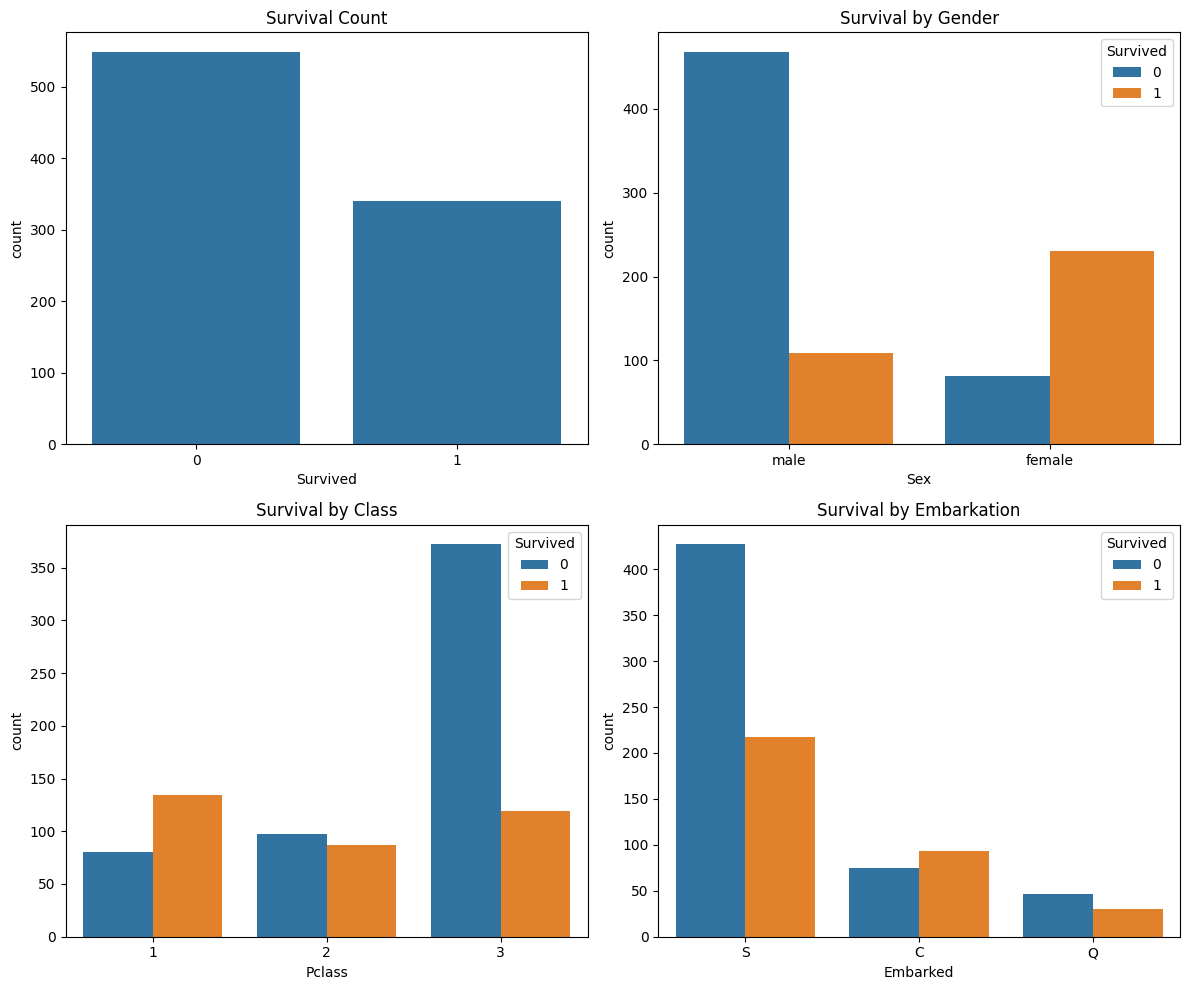

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Survival Count
sns.countplot(x='Survived', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Survival Count')

# Survival by Gender
sns.countplot(x='Sex', hue='Survived', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Survival by Gender')

# Survival by Class
sns.countplot(x='Pclass', hue='Survived', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Survival by Class')

# Survival by Embarkation
sns.countplot(x='Embarked', hue='Survived', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Survival by Embarkation')

plt.tight_layout()
plt.show()


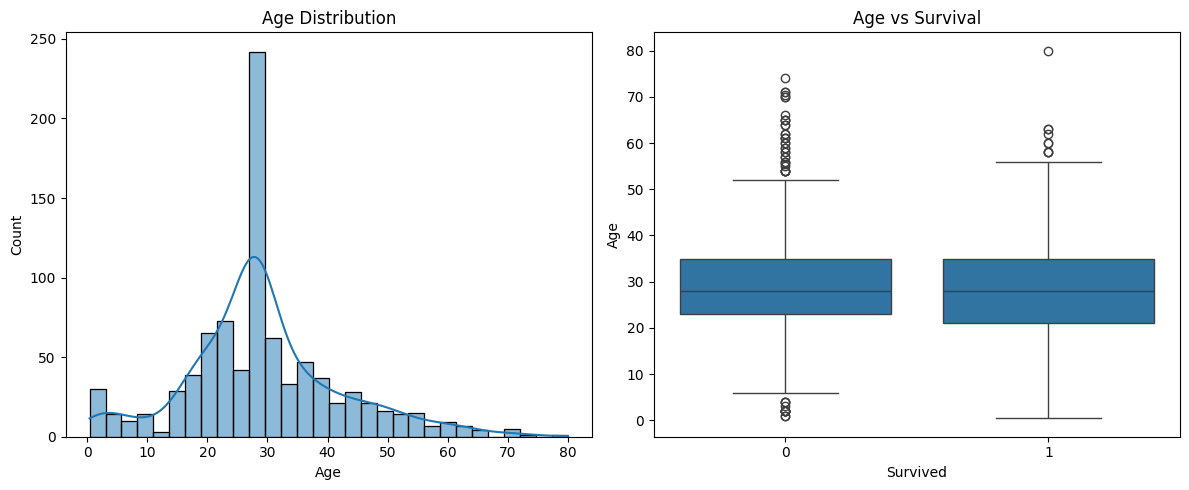

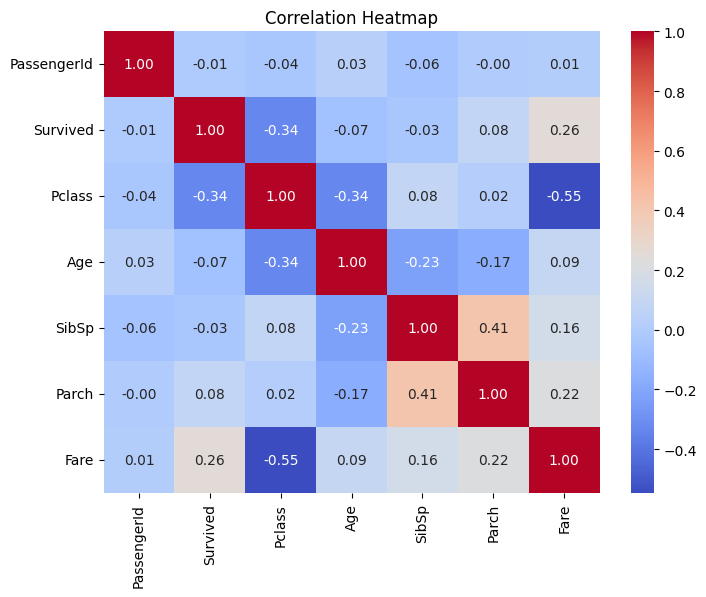

In [14]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")

plt.subplot(1, 2, 2)
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Age vs Survival")

plt.tight_layout()
plt.show()

# Step 9: Correlation heatmap
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()